In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.getcwd()

'/Users/gardar/Documents/UCL/ELEC0054 IMLS Research Project/04 Implementation/03 Hydraulic Simulations'

In [3]:
files = sorted(glob.glob('studies/logs/*.csv'))

In [4]:
names = [filename.replace('studies/logs/','').replace('.csv','') for filename in files]

In [5]:
df_dict = {key:value for (key,value) in zip(names,[pd.read_csv(file,index_col='Unnamed: 0') for file in files])}

In [10]:
df_dict

{'l-town-chebnet-pipe_length-minmax-1':     trn_loss  val_loss  val_rel_err  val_rel_err_o  val_rel_err_h
 0   0.021017  0.011593     0.089039       0.082232       0.089339
 1   0.007621  0.004771     0.060247       0.054352       0.060507
 2   0.003508  0.002433     0.040005       0.042228       0.039907
 3   0.002428  0.002031     0.035990       0.037940       0.035904
 4   0.001857  0.001708     0.032812       0.036207       0.032662
 ..       ...       ...          ...            ...            ...
 95  0.000022  0.000024     0.004219       0.003501       0.004251
 96  0.000023  0.000021     0.003759       0.003748       0.003760
 97  0.000026  0.000027     0.004631       0.003723       0.004671
 98  0.000024  0.000024     0.004290       0.003738       0.004314
 99  0.000026  0.000029     0.004824       0.004892       0.004821
 
 [100 rows x 5 columns],
 'l-town-chebnet-pipe_length-minmax-self_loop-1':     trn_loss  val_loss  val_rel_err  val_rel_err_o  val_rel_err_h
 0   0.018328 

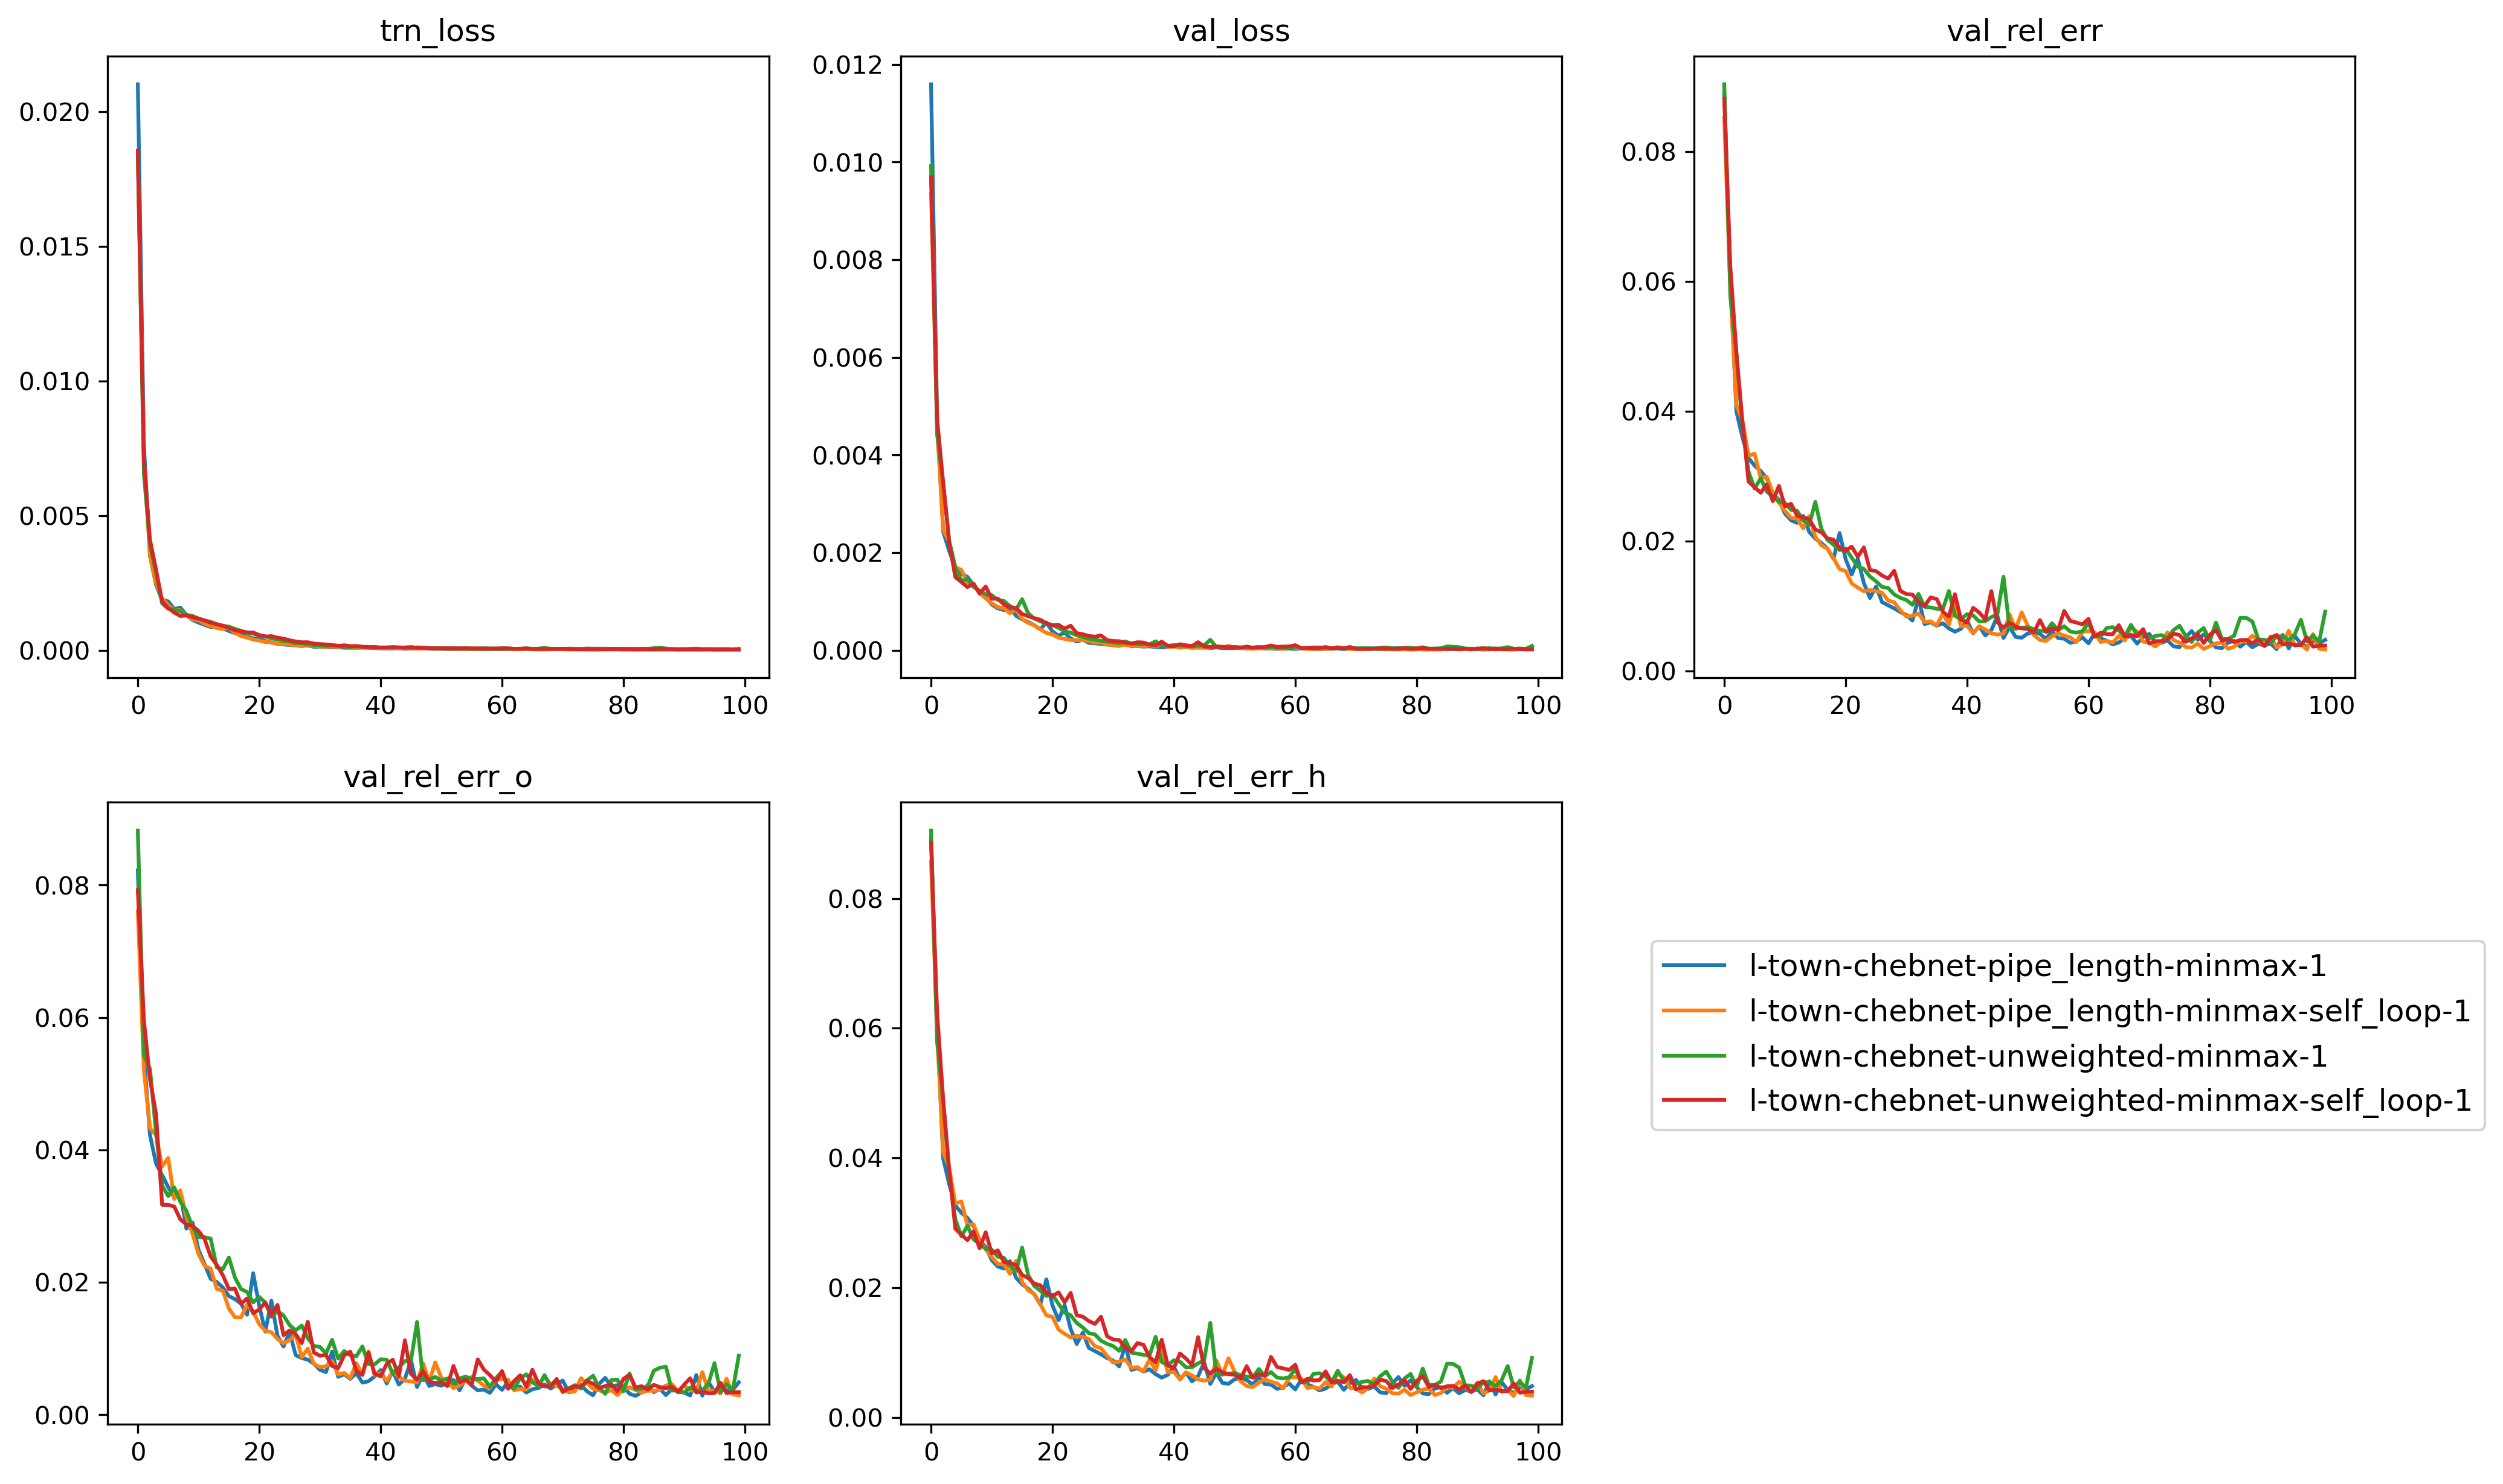

In [6]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10), dpi=300)

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in df_dict.items():
        axis.plot(val[line], label = key)
    axis.set_title(line)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.45, -0.1, 0.5, 0.5),prop={'size': 12})
fig.delaxes(ax[1,2])
plt.show()

In [7]:
best_loss={}
for key,df in df_dict.items():
    best_loss[key]=df.min()

In [8]:
best_loss

{'l-town-chebnet-pipe_length-minmax-1': trn_loss         0.000022
 val_loss         0.000018
 val_rel_err      0.003387
 val_rel_err_o    0.002857
 val_rel_err_h    0.003408
 dtype: float64,
 'l-town-chebnet-pipe_length-minmax-self_loop-1': trn_loss         0.000021
 val_loss         0.000016
 val_rel_err      0.003316
 val_rel_err_o    0.002932
 val_rel_err_h    0.003320
 dtype: float64,
 'l-town-chebnet-unweighted-minmax-1': trn_loss         0.000035
 val_loss         0.000031
 val_rel_err      0.004384
 val_rel_err_o    0.003158
 val_rel_err_h    0.004430
 dtype: float64,
 'l-town-chebnet-unweighted-minmax-self_loop-1': trn_loss         0.000026
 val_loss         0.000024
 val_rel_err      0.003786
 val_rel_err_o    0.003245
 val_rel_err_h    0.003809
 dtype: float64}

In [36]:
names

['l-town-chebnet-pipe_length-minmax-1',
 'l-town-chebnet-pipe_length-minmax-self_loop-1',
 'l-town-chebnet-unweighted-minmax-1',
 'l-town-chebnet-unweighted-minmax-self_loop-1']

In [41]:
short_names=['PL','PL-SL','UW','UW-SL']

/opt/anaconda3/envs/GSP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


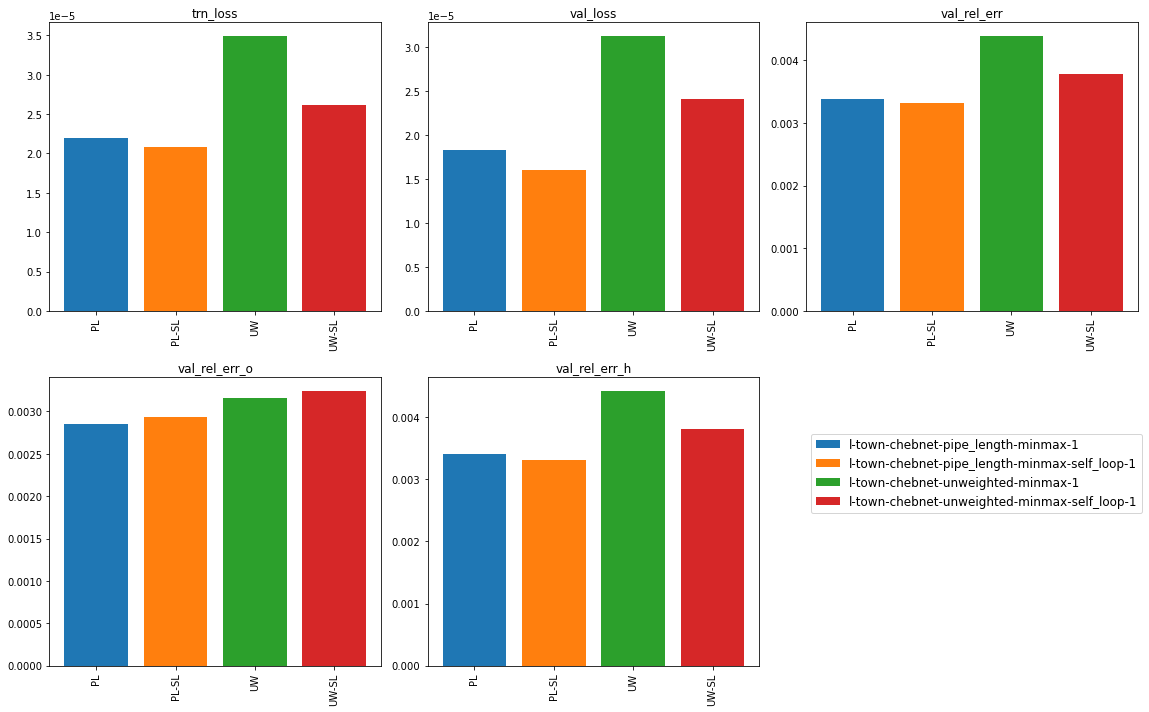

In [47]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in best_loss.items():
        axis.bar(x=key, height=val[line], label = key)
    axis.set_title(line)
    axis.set_xticklabels(short_names,rotation=90)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.5, -0.1, 0.5, 0.5),prop={'size': 12})
fig.delaxes(ax[1,2])
plt.tight_layout()
plt.show()

In [ ]:
ddd